# Chi-square test ( $\chi^2$)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Completed fertility

Completed fertility refers to the number of live births that a woman born in a particular year has had by the end of her reproductive life. One limitation of this measure of fertility is that it cannot be observed until a woman's reproductive life is complete.
For 1878 women over 45, who participated in the sociological survey of the inhabitants of Switzerland, the number of children is known. This feature is a typical counter, and, therefore, it can be described by the Poisson distribution.

* **sample** - integer vector of length $n$, characterizing the number of children of the interviewed woman
* **null hypothesis $H_0$** - the quantity has a Poisson distribution

In [8]:
fin = open('fertility.txt', 'r')
data = list(map(lambda x: int(x.strip()), fin.readlines()))

In [10]:
data[:20]

[0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 2, 2, 4]

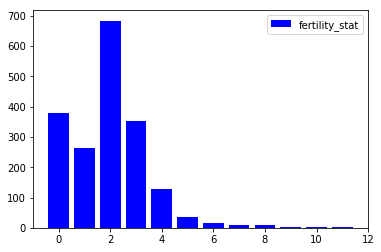

In [12]:
pylab.bar(range(12), np.bincount(data), color = 'b', label = 'fertility_stat')
pylab.legend()

In [13]:
l = np.mean(data)
l

1.9371671991480299

## Goodness-of-fit analysis

In [17]:
observed_frequences = np.bincount(data)
observed_frequences

array([379, 262, 684, 353, 128,  35,  16,   8,  10,   1,   1,   1])

In [18]:
expected_frequences = [len(data)*stats.poisson.pmf(x, l) for x in range(min(data), max(data) + 1)]
expected_frequences

[270.6416065637888,
 524.27804296009776,
 507.80711402791167,
 327.90242826296458,
 158.80045713800124,
 61.524607355489749,
 19.863908551586047,
 5.4971017275726499,
 1.3311006446292126,
 0.28650716750450117,
 0.055501228721053016,
 0.009774105435530582]

In [19]:
pylab.bar(range(len(expected_frequences)), expected_frequences, color = 'b', label = 'poisson_distr')
pylab.legend()

Chi-square test: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
Under the null hypothesis, the chi-square distribution with the number of degrees of freedom $K-1-m$, where $m$ - number of distribution parameters estimated from the sample.

In [21]:
# The chi square test tests the null hypothesis that the categorical data has the given frequencies.
stats.chisquare(observed_frequences, expected_frequences, ddof = 1)

Power_divergenceResult(statistic=431.57522052849163, pvalue=1.7726131802335119e-86)